In [158]:
import pandas as pd
from scipy import stats
Data=pd.read_excel('./C2.xlsx')

d:\new_1\envs\new_conda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


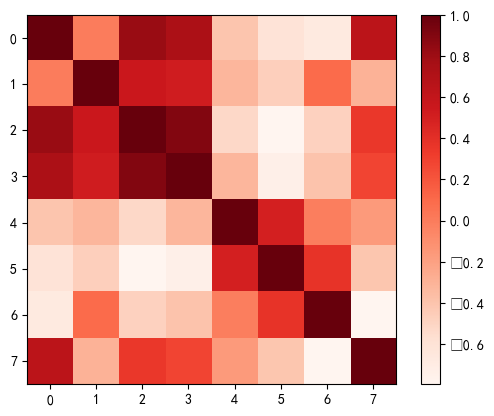

In [159]:
####线性相关性分析
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.imshow(Data.corr(),cmap=plt.cm.Reds,interpolation='nearest')
plt.colorbar()

In [160]:
###多项式回归分析+对应模型误差分析
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
Cols=Data.columns
X_Ori=Data[Cols[0:2]]
X_Trans=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_Ori)
Models=[]
for i in Cols[2:]:
    Modelx=LinearRegression()
    Y=Data[i]
    Modelx.fit(X_Trans,Y)
    print(i,"评分",Modelx.score(X_Trans,Y))
    print("r2系数为",r2_score(Y,Modelx.predict(X_Trans)))
    
    ###检验误差是否为白噪声
    WuCha=Y-Modelx.predict(X_Trans)
    
    # 计算ACF
    acf = sm.tsa.stattools.acf(WuCha)

    # 绘制ACF图
    # sm.graphics.tsa.plot_acf(WuCha, lags=20)
    # plt.show()    
    
    # 进行Ljung-Box检验
    lb_test = sm.stats.diagnostic.acorr_ljungbox(WuCha, lags=5)
    print(lb_test)
    Models.append(Modelx)

厚度mm 评分 0.9997884650764719
r2系数为 0.9997884650764719
    lb_stat  lb_pvalue
1  1.237688   0.265917
2  1.409417   0.494253
3  1.811457   0.612445
4  4.338903   0.362079
5  7.582186   0.180815
孔隙率（%） 评分 0.8913008121026815
r2系数为 0.8913008121026815
    lb_stat  lb_pvalue
1  1.313925   0.251685
2  1.804461   0.405664
3  1.904983   0.592360
4  2.393386   0.663823
5  6.278936   0.280016
压缩回弹性率（%） 评分 0.9646429380778619
r2系数为 0.9646429380778619
    lb_stat  lb_pvalue
1  1.547797   0.213461
2  2.901955   0.234341
3  3.416777   0.331717
4  4.419526   0.352197
5  4.441926   0.487691
过滤阻力Pa 评分 0.6523673018136757
r2系数为 0.6523673018136757
     lb_stat  lb_pvalue
1   5.211763   0.022435
2  11.921922   0.002577
3  17.450457   0.000571
4  17.648915   0.001445
5  17.693107   0.003357
过滤效率（%） 评分 0.7613758285076698
r2系数为 0.7613758285076698
      lb_stat     lb_pvalue
1   41.898930  9.611520e-11
2   77.863234  1.236555e-17
3   98.790057  2.829044e-21
4  113.716909  1.172340e-23
5  119.643058  3.735370e-24
透气

In [161]:
###对过滤效率做出回归分析
X1=Data[Cols[:2]]
Y1=Data['过滤效率（%）']
ModelQ=LinearRegression()
X1=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X1)
ModelQ.fit(X1,Y1)
print("过滤效率（%）评分",ModelQ.score(X1,Y1))
print(ModelQ.coef_)
###由对应系数找出平面最大点即可。

过滤效率（%）评分 0.7613758285076698
[-1.38979867e+00  1.02238810e-01  8.32533333e-02 -4.63074000e-03
  2.17514286e-05]


In [162]:

def Output(Modless,input):
    Results=[]
    input=PolynomialFeatures(degree=2,include_bias=False).fit_transform([input])
    for i in range(len(Modless)):
        Results.append(Modless[i].predict(input)[0])
    return Results
    pass
Trans=PolynomialFeatures(degree=2,include_bias=False)
FUN1=lambda x:Output(Models,x)[3]+1/Output(Models,x)[4]

cons=({'type':'ineq','fun':lambda x:100-x[0]},
      {'type':'ineq','fun':lambda x:2000-x[1]},
      {'type':'ineq','fun':lambda x:3-Output(Models,x)[0]},
      {'type':'ineq','fun':lambda x:Output(Models,x)[2]-85})
      

In [163]:
#用权重法进行多目标优化)
import numpy as np
from scipy.optimize import minimize
x0 = np.array((1.0, 2.0)) # 设置初始值
res = minimize(FUN1, x0, method='SLSQP', constraints=cons)
print('工艺参数为',res.x)

print('最小值：',res.fun)
print('最优解：',res.x)
print('迭代终止是否成功：', res.success)
print('迭代终止原因：', res.message)

工艺参数为 [ 40.5729375  865.83574569]
最小值： 25.121986149012134
最优解： [ 40.5729375  865.83574569]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully
